# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Import train data

In [2]:
data = pd.read_csv("data.csv", index_col=0)
min_value = data.iloc[:, 5:].min().min()
data = data.fillna(min_value - 1)
data.iloc[:, 5:] = data.iloc[:, 5:] + (min_value - 1)*(-1)


In [3]:
name_mac_relation = pd.read_csv("mac_name_relation.csv", index_col=0)
good_aps = name_mac_relation[name_mac_relation['ap_name'].isin( ["Guest-CentraleSupelec", "eduroam", 'stop&go', 'CD91', 'fabrique2024'])]["ap_mac"].to_list()
columns_to_maintain  = good_aps + data.columns[:5].to_list()
data = data[data.columns.intersection(columns_to_maintain)]

In [4]:
AP_columns = list(data.columns[5:])

In [5]:
corridor_groups = {"CN1":["LC410", "LC412", "LC413"],"CN2":[ "LC414", "LC415", "LC416"],"CN3":["LC417"], "CE1":["LC424", "LC426"],"CS1":["LC437"],"CS2":["LC442"],"CS3":["LC443", "LC448"], "CO1":["LC455"]}
data["class"] = data["room"]
for cor in corridor_groups.keys():
    samples_mask_of_corridor = data["room"].isin(corridor_groups[cor]) & (data["room_part"] == 5)
    data["class"] = data["class"].mask(samples_mask_of_corridor, cor)
    print("nb of samples in "+cor+" :", samples_mask_of_corridor.sum())

nb of samples in CN1 : 1155
nb of samples in CN2 : 1150
nb of samples in CN3 : 300
nb of samples in CE1 : 800
nb of samples in CS1 : 200
nb of samples in CS2 : 400
nb of samples in CS3 : 700
nb of samples in CO1 : 300


In [6]:
train = data[["class"] + AP_columns]

# Import test data

In [7]:
vitor_data = pd.read_csv("data_test_vitor.csv", index_col=0)
iphone_data = pd.read_csv("data_test_iphone.csv", index_col=0)

In [8]:
iphone_data = iphone_data.fillna(min_value - 1)
iphone_data.iloc[:, 5:] = iphone_data.iloc[:, 5:] + (min_value - 1)*(-1)

vitor_data = vitor_data.fillna(min_value - 1)
vitor_data.iloc[:, 5:] = vitor_data.iloc[:, 5:] + (min_value - 1)*(-1)

In [9]:
missing_columns = [col for col in data.columns if col not in iphone_data.columns]

# Criar DataFrame com colunas faltantes preenchidas com 0.0
missing_df = pd.DataFrame(0.0, index=iphone_data.index, columns=missing_columns)

# Concatenar o DataFrame original com o DataFrame das colunas faltantes
iphone_data = pd.concat([iphone_data, missing_df], axis=1)

# Reorganizar as colunas para a ordem desejada
iphone_data = iphone_data[data.columns]

In [10]:
missing_columns = [col for col in data.columns if col not in vitor_data.columns]

# Criar DataFrame com colunas faltantes preenchidas com 0.0
missing_df = pd.DataFrame(0.0, index=vitor_data.index, columns=missing_columns)

# Concatenar o DataFrame original com o DataFrame das colunas faltantes
vitor_data = pd.concat([vitor_data, missing_df], axis=1)

# Reorganizar as colunas para a ordem desejada
vitor_data = vitor_data[data.columns]

In [11]:
corridor_groups = {"CN1":["LC410", "LC412", "LC413"],"CN2":[ "LC414", "LC415", "LC416"],"CN3":["LC417"], "CE1":["LC424", "LC426"],"CS1":["LC437"],"CS2":["LC442"],"CS3":["LC443", "LC448"], "CO1":["LC455"]}
iphone_data["class"] = iphone_data["room"]
for cor in corridor_groups.keys():
    samples_mask_of_corridor = iphone_data["room"].isin(corridor_groups[cor]) & (iphone_data["room_part"] == 5)
    iphone_data["class"] = iphone_data["class"].mask(samples_mask_of_corridor, cor)
    print("nb of samples in "+cor+" :", samples_mask_of_corridor.sum())
    

nb of samples in CN1 : 66
nb of samples in CN2 : 63
nb of samples in CN3 : 22
nb of samples in CE1 : 44
nb of samples in CS1 : 19
nb of samples in CS2 : 20
nb of samples in CS3 : 43
nb of samples in CO1 : 22


In [12]:
corridor_groups = {"CN1":["LC410", "LC412", "LC413"],"CN2":[ "LC414", "LC415", "LC416"],"CN3":["LC417"], "CE1":["LC424", "LC426"],"CS1":["LC437"],"CS2":["LC442"],"CS3":["LC443", "LC448"], "CO1":["LC455"]}
vitor_data["class"] = vitor_data["room"]
for cor in corridor_groups.keys():
    samples_mask_of_corridor = vitor_data["room"].isin(corridor_groups[cor]) & (vitor_data["room_part"] == 5)
    vitor_data["class"] = vitor_data["class"].mask(samples_mask_of_corridor, cor)
    print("nb of samples in "+cor+" :", samples_mask_of_corridor.sum())
    

nb of samples in CN1 : 180
nb of samples in CN2 : 180
nb of samples in CN3 : 60
nb of samples in CE1 : 120
nb of samples in CS1 : 60
nb of samples in CS2 : 60
nb of samples in CS3 : 120
nb of samples in CO1 : 60


In [13]:
test_pc = vitor_data[["class"] + AP_columns]
test_mobile = iphone_data[["class"] + AP_columns]

# Router Identification

In [22]:

routers = list(set([s[:-3] for s in AP_columns]))

In [62]:
routers_to_test = [s for s in AP_columns if s[:-3] == routers[12]]  # 11
routers_to_test = [s for s in AP_columns if s[:-3] == '94:d4:69:fd:ac:']  # 11


In [64]:
group_of_APs_based_on_routers = [[s for s in AP_columns if s[:-3] == router] for router in routers]

In [93]:
routers

['a4:88:73:4e:40:',
 '94:d4:69:fa:94:',
 '94:d4:69:f7:98:',
 '94:d4:69:fd:ae:',
 '94:d4:69:f6:b6:',
 '94:d4:69:f7:90:',
 '70:d3:79:2e:e8:',
 '94:d4:69:f9:5b:',
 '94:d4:69:f6:e8:',
 '94:d4:69:fa:7f:',
 '94:d4:69:fd:b0:',
 '94:d4:69:fd:b1:',
 '94:d4:69:f6:ed:',
 '84:3d:c6:9b:e3:',
 '70:f3:5a:96:66:',
 '94:d4:69:f6:c0:',
 '94:d4:69:f6:c8:',
 '94:d4:69:f6:e3:',
 '94:d4:69:fd:b2:',
 '94:d4:69:f6:d9:',
 '84:3d:c6:f5:f1:',
 '94:d4:69:fd:aa:',
 '70:d3:79:2e:d6:',
 '94:d4:69:f6:b3:',
 '94:d4:69:fa:9a:',
 '70:d3:79:2e:ba:',
 '94:d4:69:fa:99:',
 '94:d4:69:f9:7d:',
 'a4:88:73:4e:03:',
 '94:d4:69:f6:e4:',
 '84:3d:c6:d6:b8:',
 '94:d4:69:f9:7f:',
 '94:d4:69:fd:ac:',
 '70:d3:79:2e:de:',
 '70:d3:79:2e:d1:',
 '70:d3:79:2e:8c:',
 '94:d4:69:f9:7e:',
 '94:d4:69:f6:c5:',
 '94:d4:69:f6:b5:']

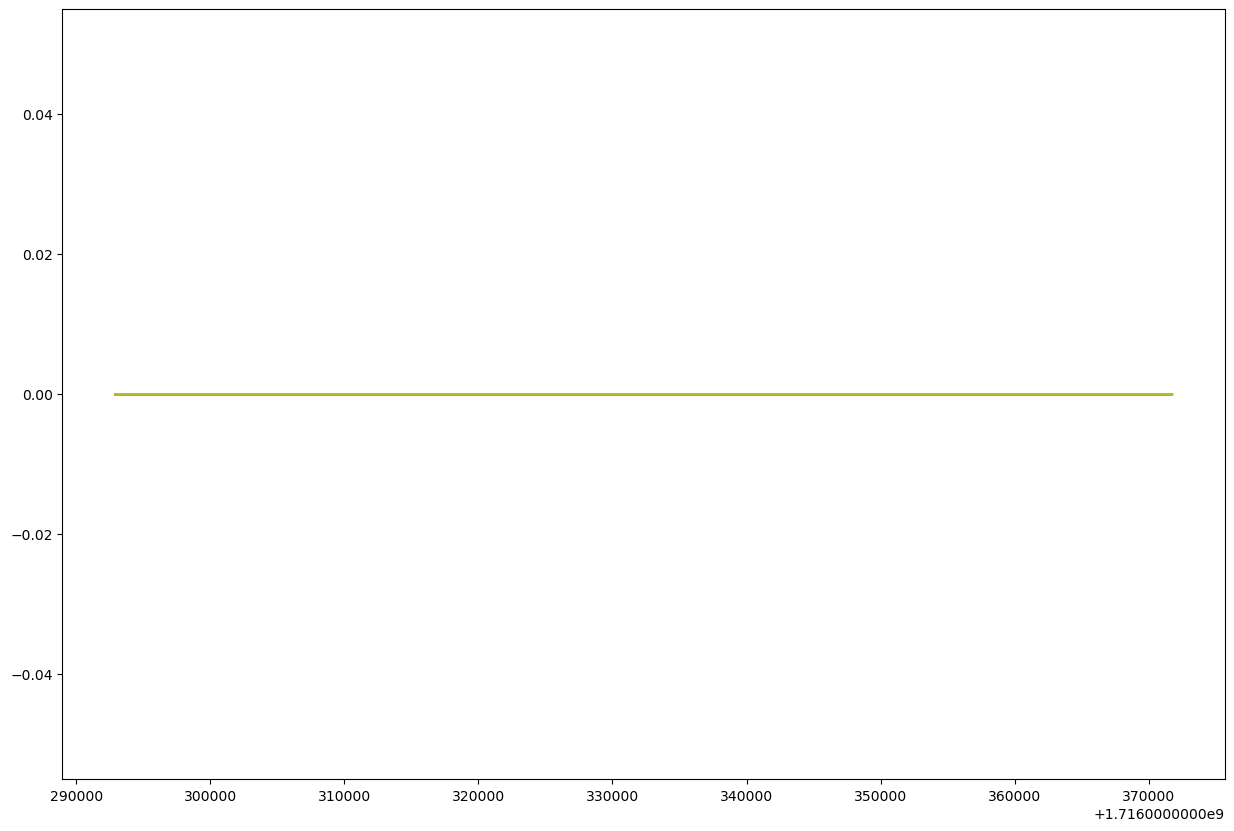

In [63]:
plt.figure(figsize=(15,10))
for router in routers_to_test:
    plt.plot(list(vitor_data['timestamp']), list(vitor_data[router]))
    

# New databases creation

In [102]:
for i, cols in enumerate(group_of_APs_based_on_routers):
    if cols[0][:-3] == '94:d4:69:fd:ac:':
        print(i)

32


In [66]:
df_train_dict = {}


for i, cols in enumerate(group_of_APs_based_on_routers):
    # Criar uma cópia do DataFrame original
    new_df = train.copy()
    
    # Definir os valores das colunas especificadas como 0
    new_df[cols] = 0.0
    
    # Armazenar o novo DataFrame no dicionário
    key = 'without_router_' + str(i)  # Usar nomes das colunas como chave
    df_train_dict[key] = new_df
df_train_dict['all_routers'] = train.copy()

# Model Evalutation

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [69]:
df_list = [df_train_dict[key] for key in df_train_dict]
df_train_knn = pd.concat(df_list, ignore_index=True)


In [81]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(df_train_knn[AP_columns], df_train_knn['class'])
predicted = neigh.predict(test_pc[AP_columns])
ground_truth = test_pc["class"].to_numpy()
np.sum(predicted == ground_truth)/len(ground_truth)


0.9428571428571428

In [115]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(df_train_knn[AP_columns], df_train_knn['class'])
predicted = neigh.predict(test_mobile[AP_columns])
ground_truth = test_mobile["class"].to_numpy()
np.sum(predicted == ground_truth)/len(ground_truth)


MemoryError: Unable to allocate 3.07 GiB for an array with shape (409, 1008920) and data type float64

## tLoc

In [85]:
from scipy.special import gamma
from scipy.special import hyp2f1
import pandas as pd
import numpy as np
import scipy

class TLoc:         

    def __init__(self, train_data: pd.DataFrame, pred_class="room"):
        # self.non_null_minimum_percentage = 0.1
        self.train_data = train_data
        # self.aps = self.get_aps_with_non_zero_minimum_percentage(self.train_data)
        self.aps = list(self.train_data.columns[1:])
        if len(self.aps) == 1:
            self.max_power = int(self.train_data[self.aps].max())
        else:
            self.max_power = int(self.train_data[self.aps].max().max())

        self.pred_class = pred_class
        self.spaces = list(self.train_data[self.pred_class].unique())

        self.power_probability_masks = {}
        self.power_prior_probability_distribution = {}
        self.eps = 1e-5


    def get_aps_with_non_zero_minimum_percentage(self, data):
        percentage_of_non_zeros = (data.iloc[:, 5:] != 0).sum() / data.shape[0]
        return data.columns[5:][percentage_of_non_zeros >= self.non_null_minimum_percentage]
    


    def get_mu_and_phi_estimation(self, data, router):
        mu = []
        phi = []
        data_of_router = data[[self.pred_class, router]]
        for space in self.spaces:
            data_of_router_in_space = data_of_router[data_of_router[self.pred_class] == space]

            data_of_router_in_space_without_zero_values = data_of_router_in_space[data_of_router_in_space[router] != 0]
            if len(data_of_router_in_space_without_zero_values) == 0:
                mu.append(0.0)
            else:
                mu.append(data_of_router_in_space_without_zero_values[router].mean())
            phi.append(1 - data_of_router_in_space_without_zero_values.shape[0] / data_of_router_in_space.shape[0])

        return mu, phi



    def train(self):
        for router in self.aps:


            self.power_probability_masks[router] = {}
            self.power_prior_probability_distribution[router] = {}

            mu, phi = self.get_mu_and_phi_estimation(self.train_data, router)


            total_num_samples_in_router = self.train_data[router].shape[0]
            for power in range(0, self.max_power):
                self.power_probability_masks[router][
                    power] = self.approximate_position_density_function_given_router(power, np.array(mu),
                                                                                    np.array(phi))
                num_samples_with_value_power_in_router = (self.train_data[router] == power).sum()

                self.power_prior_probability_distribution[router][
                    power] = num_samples_with_value_power_in_router / total_num_samples_in_router

            

    def cumulative_distribution_function_of_t_student(self, x, v):

        return 0.5 + x * gamma((v + 1) / 2) * hyp2f1(1 / 2, (v + 1) / 2, 3 / 2, -(x ** 2) / v) / (
                np.sqrt(v * np.pi) * gamma(v / 2))
    
    def cumulative_distribution_function_of_power(self, power, mu, phi, sigma, v):

        cdf = phi * np.heaviside(power, 1) + (1 - phi) * self.cumulative_distribution_function_of_t_student(
            (power - mu) / sigma, v)
        
        return cdf
    

    def approximate_position_density_function_given_router(self, power, mu, phi, sigma=5, num_samples_per_ap=30, t_score_alpha=0.05):

        v = np.ceil(num_samples_per_ap * (1 - phi) - 1)
        v = np.where(v <= 0, 1, v)

        t_score = scipy.stats.t.ppf(0.5 + t_score_alpha, v)

        density_function = self.cumulative_distribution_function_of_power(power + t_score * sigma, mu, phi, sigma, v) - self.cumulative_distribution_function_of_power(
                    power - t_score * sigma, mu, phi, sigma, v)  # power, mu, phi, sigma, v

        return density_function
    

    def pred(self, X_test):

        y_pred = []
        confidence = []
        min_prob = self.eps * np.ones(len(self.spaces))

        for _, test_sample in X_test.iterrows():

            distribution_xy_given_bf = np.ones(len(self.spaces))

            for router in self.aps:

                    power = int(test_sample[router])

                    try:
                        prob_p_given_xybfr = self.power_probability_masks[router][power]
                    except KeyError:
                        # print(f"Error predicting router {router}, power {power}")
                        continue
                    


                    prob_p_given_xybfr = np.maximum(prob_p_given_xybfr, min_prob)
                    #prob_p_given_xybfr = prob_p_given_xybfr / prob_p_given_xybfr.sum()
                    #prob_xy_given_pbfr = prob_p_given_xybfr / (
                    #                tloc.eps + tloc.power_prior_probability_distribution[router][power])


                    distribution_xy_given_bf = distribution_xy_given_bf * prob_p_given_xybfr




            room_pred = self.spaces[distribution_xy_given_bf.argmax()]
            confidence.append(max(distribution_xy_given_bf))
            y_pred.append(room_pred)

        y_pred = np.array(y_pred)
        ground_truth = np.array(list(X_test[self.pred_class]))
        ac = np.sum(y_pred == ground_truth)/len(ground_truth)
        return ac, y_pred, ground_truth, confidence

In [86]:
tloc = TLoc(train, pred_class="class")
tloc.train()

In [87]:
accuracy_pc, prediction, ground_truth, confidence = tloc.pred(test_pc)


In [ ]:
tloc_models = dict()
i = 0
for key in df_train_dict:
    tloc_models[key] = TLoc(df_train_dict[key], pred_class="class")
    tloc_models[key].train()
    print(i)
    i += 1


In [ ]:
predictions = dict()
confidences = dict()

i = 0
for key in tloc_models:
    accuracy_pc, prediction, ground_truth, confidence = tloc_models[key].pred(test_pc)
    predictions[key] = prediction
    confidences[key] = confidence
    print(i)
    i += 1


In [91]:
max(confidences, key=lambda k: sum(confidences[k]))


'without_router_37'

In [92]:
from functools import reduce
import operator

def produto(lista):
    return reduce(operator.mul, lista, 1)

max(confidences, key=lambda k: produto(confidences[k]))


'without_router_0'

In [94]:
def best_predictions(predictions, confidences):
    best_preds = []
    for i in range(len(predictions['without_router_0'])):
        confs = [confidences[model][i] for model in predictions]
        best_pred_index = np.argmax(confs)
        best_preds.append(predictions[list(predictions.keys())[best_pred_index]][i])
    return best_preds


In [95]:
best_preds = best_predictions(predictions, confidences)


In [97]:
y_pred = np.array(best_preds)
np.sum(y_pred == ground_truth)/len(ground_truth)

0.9661904761904762

In [105]:
accuracy, prediction, ground_truth, confidence = tloc_models['without_router_32'].pred(test_mobile)

In [106]:
accuracy

0.8797091870456047

In [107]:
predictions_iphone = dict()
confidences_iphone = dict()

i = 0
for key in tloc_models:
    accuracy_pc, prediction, ground_truth, confidence = tloc_models[key].pred(test_mobile)
    predictions_iphone[key] = prediction
    confidences_iphone[key] = confidence
    print(i)
    i += 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [113]:
ground_truth_iphone = np.array(list(test_mobile["class"]))
best_preds_iphone = best_predictions(predictions_iphone, confidences_iphone)
y_pred_iphone = np.array(best_preds_iphone)
np.sum(y_pred_iphone == ground_truth_iphone)/len(ground_truth_iphone)

0.8512888301387971

# Choose Routers

In [116]:
binary_train = train.copy()
def check_nonzero(group):
    return any(group != 0)
i = 0
for group in group_of_APs_based_on_routers:

    group_name = "presence_of_" + str(i)
    binary_train[group_name] = binary_train[group].apply(check_nonzero, axis=1).astype(int)
    i += 1

In [126]:
binary_columns = list(binary_train.columns[-39:])

In [127]:
binary_train = binary_train[["class"] + binary_columns]

In [128]:
binary_train

,class,presence_of_0,presence_of_1,presence_of_2,presence_of_3,presence_of_4,presence_of_5,presence_of_6,presence_of_7,presence_of_8,...,presence_of_29,presence_of_30,presence_of_31,presence_of_32,presence_of_33,presence_of_34,presence_of_35,presence_of_36,presence_of_37,presence_of_38
0,LC410,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,LC410,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LC410,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LC410,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LC410,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25218,CN1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
25219,CN1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
25220,CN1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
25221,CN1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [129]:
prob_matrix = binary_train[binary_columns].corr(method='kendall')

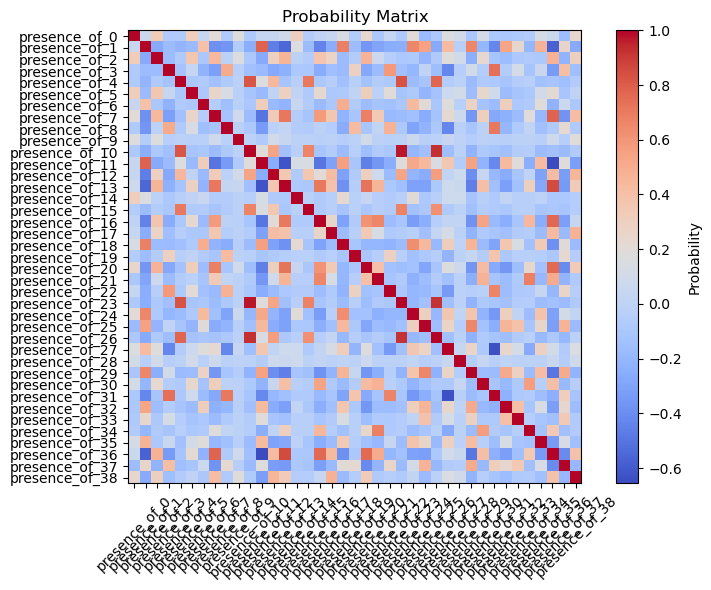

In [131]:
plt.figure(figsize=(8, 6))
plt.imshow(prob_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Probability')
plt.title('Probability Matrix')
plt.xticks(range(len(prob_matrix.columns)), prob_matrix.columns, rotation=45)
plt.yticks(range(len(prob_matrix.columns)), prob_matrix.columns)
plt.tight_layout()
plt.show()